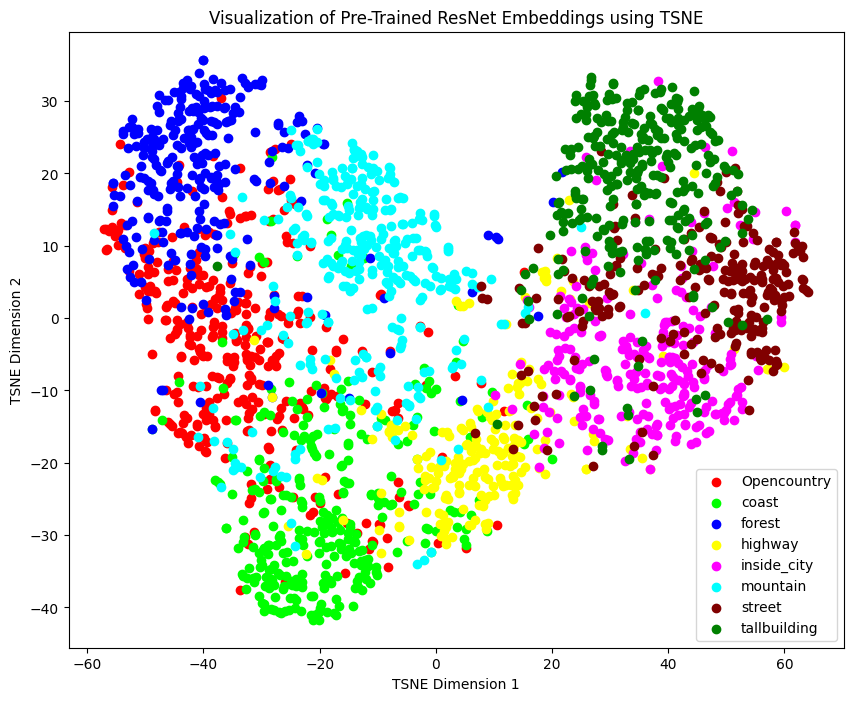

In [8]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle
import matplotlib.cm as cm

def open_file(file_path):
    with open(file_path, "rb") as file:
        embeddings, labels = pickle.load(file)
    return embeddings, labels

file = '/ghome/group04/MCV-C5-G4/week3/pre_trained/jobs/validation_features.pkl'
embeddings, labels = open_file(file)

embeddings = np.array(embeddings)

reduced_embedding = TSNE(n_components=2, perplexity=30).fit_transform(embeddings)

classes = ['Opencountry', 'coast', 'forest', 'highway', 'inside_city', 'mountain', 'street', 'tallbuilding']

class_colors = {
    'Opencountry': (255, 0, 0),    # Red
    'coast': (0, 255, 0),           # Green
    'forest': (0, 0, 255),          # Blue
    'highway': (255, 255, 0),       # Yellow
    'inside_city': (255, 0, 255),   # Magenta
    'mountain': (0, 255, 255),      # Cyan
    'street': (128, 0, 0),          # Maroon
    'tallbuilding': (0, 128, 0)     # Dark Green
}

class_colors = {key: tuple(np.array(value) / 255) for key, value in class_colors.items()}


class_colors_map = {class_name: class_colors[class_name] for class_name in classes}

class_colors = [class_colors_map[class_name] for class_name in classes]

plt.figure(figsize=(10, 8))
for label in range(len(classes)):
    mask = np.array([l == label for l in labels])
    plt.scatter(reduced_embedding[mask, 0], reduced_embedding[mask, 1], color=class_colors[label], label=classes[label])

plt.title('Visualization of Pre-Trained ResNet Embeddings using TSNE')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.legend()
plt.show()
